# Convolucion y correlacion

In [1]:
import pandas as pd
import numpy as np
import math
from scipy.fft import fft, ifft
import scipy.signal as sg
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("seaborn")
sns.set(style="white")

## Convolucion en el DT

In [2]:
N = 256
tiempo = np.arange(N)
df_ej = pd.DataFrame({
    'tiempo': tiempo,
    'f1': [0] * 99 + [1] * 101 + [0] * 56,
    'f2': [math.e**(-0.03*ti) for ti in tiempo]
})

<AxesSubplot:xlabel='tiempo', ylabel='value'>

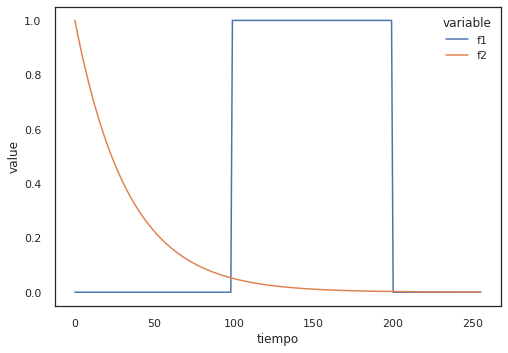

In [3]:
sns.lineplot(x="tiempo", y="value", hue='variable', data=pd.melt(df_ej, 'tiempo'))

In [4]:
def convolucion(serie_1, serie_2):
    n = len(serie_1)
    serie_3 = [-1] * n
    for i in range(n):
        suma = 0
        j = 1
        while j <= i:
            suma = suma + serie_1[j] * serie_2[i - j + 1]
            j += 1
        serie_3[i] = suma
    return serie_3

In [5]:
df_ej['f3'] = convolucion(df_ej.f1, df_ej.f2)

<AxesSubplot:ylabel='f3'>

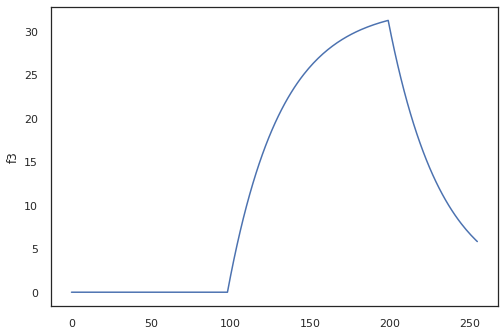

In [6]:
sns.lineplot(x=tiempo, y=df_ej.f3)

## Convolucion en el DF

In [7]:
df_fft = pd.DataFrame({
    'tiempo': tiempo,
    'f1': fft(df_ej.f1.values),
    'f1_mod': np.abs(fft(df_ej.f1.values)),
    'f2': fft(df_ej.f2.values),
    'f2_mod': np.abs(fft(df_ej.f2.values))
})

df_fft['f3'] = df_fft.f1 * df_fft.f2
df_fft['f3_mod'] = np.abs(df_fft.f3)
df_fft['f3b'] = (ifft(df_fft.f3.values)).real

<AxesSubplot:xlabel='tiempo', ylabel='f1_mod'>

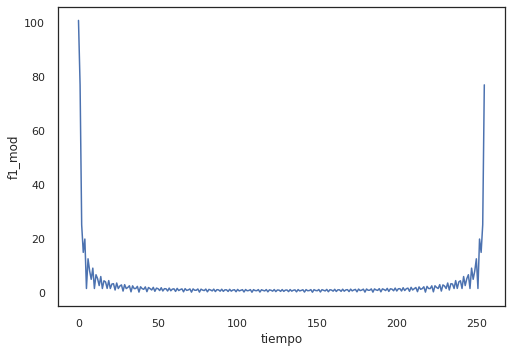

In [8]:
sns.lineplot(x=df_fft.tiempo, y=df_fft.f1_mod)

<AxesSubplot:xlabel='tiempo', ylabel='f2_mod'>

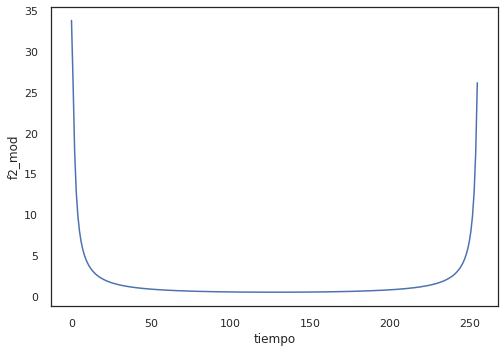

In [9]:
sns.lineplot(x=df_fft.tiempo, y=df_fft.f2_mod)

<AxesSubplot:xlabel='tiempo', ylabel='f3_mod'>

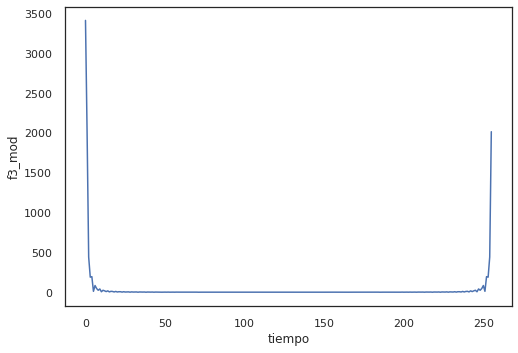

In [10]:
sns.lineplot(x=df_fft.tiempo, y=df_fft.f3_mod)

<AxesSubplot:xlabel='tiempo', ylabel='value'>

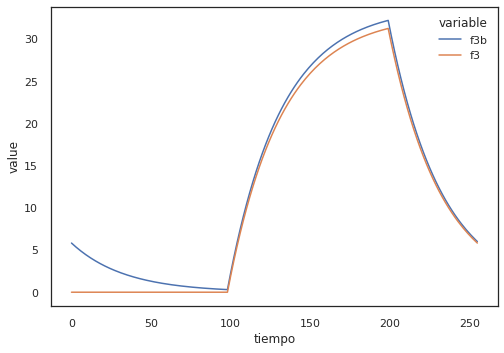

In [11]:
sns.lineplot(x='tiempo', y='value', hue='variable', data=pd.melt(pd.DataFrame({'tiempo': tiempo, 'f3b': df_fft.f3b,'f3': df_ej.f3}), 'tiempo'))

## Convolucion con convolve

<AxesSubplot:>

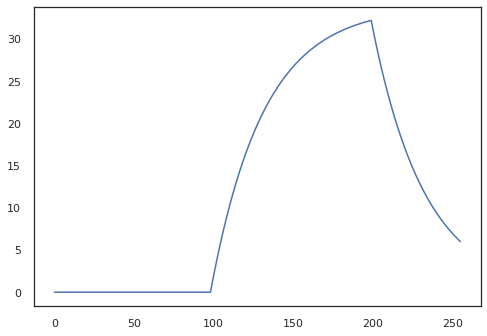

In [12]:
convolution = sg.convolve(df_ej.f1.values, df_ej.f2.values,mode='full', method='direct')
sns.lineplot(x=tiempo, y=convolution[:256])

## Correlacion cruzada con correlate

<AxesSubplot:>

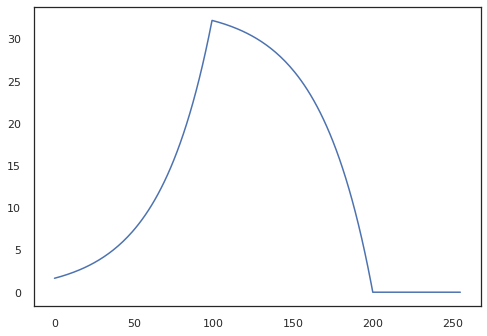

In [13]:
correlate = sg.correlate(df_ej.f1.values, df_ej.f2.values,mode='full')
sns.lineplot(x=tiempo, y=correlate[255:])

## Correlacion cruzada de dos pulsos con CCF

In [14]:
p5d5 = np.repeat(0, N)
p5d5[4:10] = 1
p5d25 = np.repeat(0, N)
p5d25[24:30] = 1
df_p = pd.DataFrame({'tiempo': tiempo, 'p5d5': p5d5,'p5d25': p5d25})

<AxesSubplot:xlabel='tiempo', ylabel='value'>

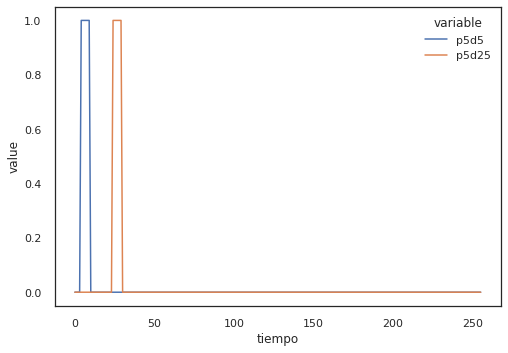

In [15]:
sns.lineplot(x='tiempo', y='value', hue='variable', data=pd.melt(df_p, 'tiempo'))

In [16]:
def ccf(x, y, lag_max = 100):
    result = sg.correlate(x - np.mean(x), y - np.mean(y), method='direct') / (np.std(y) * np.std(x) * len(y))
    length = (len(result) - 1) // 2
    lo = length - lag_max
    hi = length + (lag_max + 1)

    return result[lo:hi]

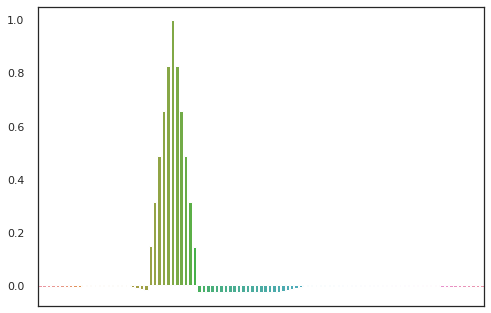

In [17]:
cross_correlate = ccf(df_p.p5d5.values, df_p.p5d25.values, 50)
fig_corr = sns.barplot(x=np.arange(len(cross_correlate)), y=cross_correlate)
fig_corr.set_xticks(np.arange(len(cross_correlate), 10))
plt.show()

## Correlacion cruzada de dos senoides

In [18]:
df_xs = pd.DataFrame({
    'tiempo': tiempo,
    'xs1': [math.sin((4*2*math.pi*ti)/N) for ti in tiempo],
    'xs2': [math.sin((4*2*math.pi*ti)/N + math.pi/2) for ti in tiempo]
})

<AxesSubplot:xlabel='tiempo', ylabel='value'>

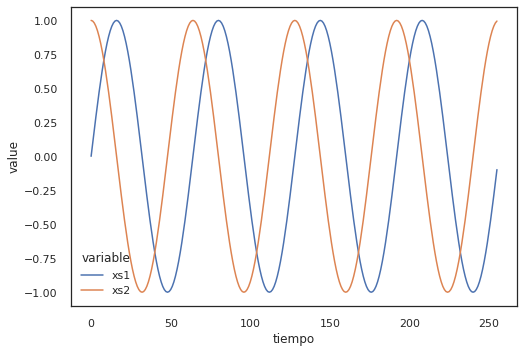

In [19]:
sns.lineplot(x='tiempo', y='value', hue='variable', data=pd.melt(df_xs, 'tiempo'))

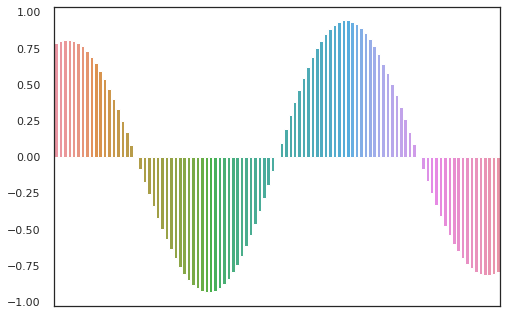

In [20]:
cross_correlate_xs = ccf(df_xs.xs1.values, df_xs.xs2.values, 50)
fig_corr = sns.barplot(x=np.arange(len(cross_correlate_xs)), y=cross_correlate_xs)
fig_corr.set_xticks(np.arange(len(cross_correlate_xs), 10))
plt.show()

In [21]:
df_xs2 = pd.DataFrame({
    'tiempo': tiempo,
    'xs1': [math.sin((4*2*math.pi*ti)/N) for ti in tiempo],
    'xs2': [math.sin((4*2*math.pi*ti)/N - math.pi/2) for ti in tiempo]
})

<AxesSubplot:xlabel='tiempo', ylabel='value'>

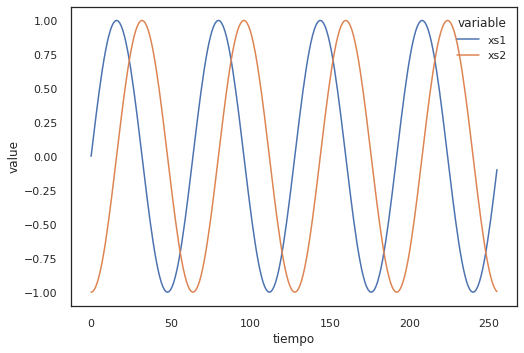

In [22]:
sns.lineplot(x='tiempo', y='value', hue='variable', data=pd.melt(df_xs2, 'tiempo'))

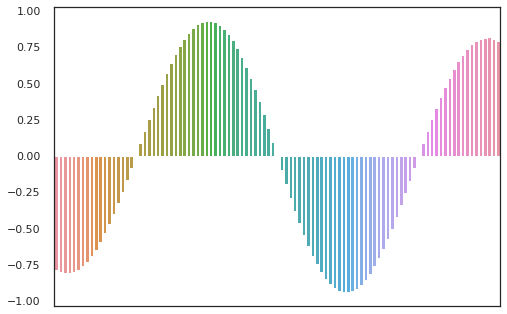

In [23]:
cross_correlate_xs2 = ccf(df_xs2.xs1.values, df_xs2.xs2.values, 50)
fig_corr = sns.barplot(x=np.arange(len(cross_correlate_xs2)), y=cross_correlate_xs2)
fig_corr.set_xticks(np.arange(len(cross_correlate_xs2), 10))
plt.show()

## Autocorrelacion de una serie de tiempo

In [24]:
x = np.random.uniform(-2, 2, N)

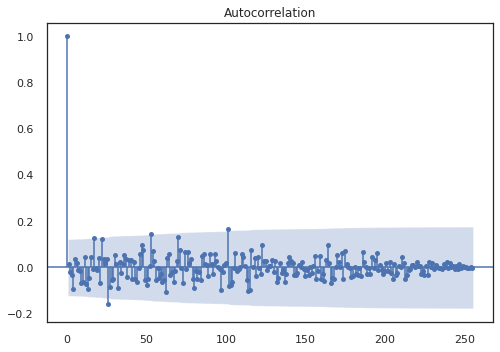

In [25]:
fig = plot_acf(x, lags=N-1)

## Autocorrelacion de una senoide

In [26]:
df_xs3 = pd.DataFrame({
    'xs1': [math.sin((4*2*math.pi*ti)/N) for ti in tiempo],
    'x': x
})
df_xs3['xs1x'] = df_xs3.xs1 + df_xs3.x

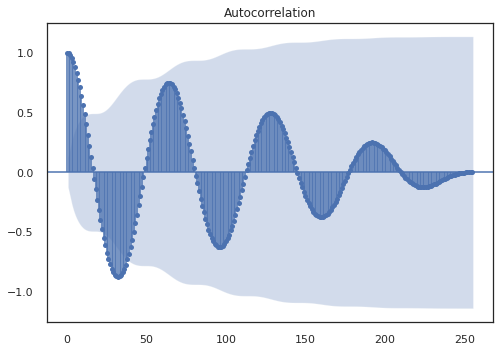

In [27]:
fig = plot_acf(df_xs3.xs1, lags=N-1)

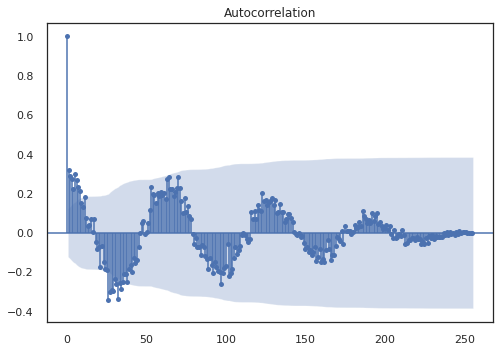

In [28]:
fig = plot_acf(df_xs3.xs1x, lags=N-1)